# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
]\----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
#https://stackoverflow.com/questions/48908772/read-csv-with-pandas-from-subdirectory-on-windows-and-unix
from pathlib import Path
root = Path()
root

PosixPath('.')

In [3]:
project_data = pd.read_csv(root / 'train_data.csv')
resource_data = pd.read_csv(root / 'resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Support Vector Machines </h1>


<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
project_data.head()
#project_data= project_data.loc[:4999,]
is_approved=project_data.pop('project_is_approved')
print(project_data.shape)

(109248, 16)


In [8]:
#https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( project_data, is_approved, test_size=0.30, random_state=42, stratify=is_approved)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76473, 16)
(32775, 16)
(76473,)
(32775,)


In [10]:
#https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)

In [11]:
print("Train shape")
print(X_train.shape)
print(y_train.shape)
print("-"*75)
print("Test shape")
print(X_test.shape)
print(y_test.shape)
print("-"*75)
print("Cross Validation shape")
print(X_val.shape)
print(y_val.shape)

Train shape
(53531, 16)
(53531,)
---------------------------------------------------------------------------
Test shape
(32775, 16)
(32775,)
---------------------------------------------------------------------------
Cross Validation shape
(22942, 16)
(22942,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

## 2.2.1 Preprocessing of Category

## 2.2.1.1 Preprocessing of Category for Train

In [12]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 2.2.1.2 Preprocessing of Category for Cross Validation

In [13]:
catogories = list(X_val['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_val['clean_categories'] = cat_list
X_val.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_val['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 2.2.1.3 Preprocessing of Category for Test

In [14]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 2.2.1.3 preprocessing of `project_subject_subcategories` for Train

In [15]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 2.1.2.1 preprocessing of `project_subject_subcategories` for Test

In [16]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_test['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 2.1.2.1 preprocessing of `project_subject_subcategories` for Cross Validation

In [17]:
sub_catogories = list(X_val['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_val['clean_subcategories'] = sub_cat_list
X_val.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_val['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### 2.1.3.1 Preprocessing of Project_Grade_Category for Test, Train and Cross Validation


In [18]:
grade_catogories = list(X_train['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    #for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
     #   if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
      #      j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_train['clean_grades'] = grade_cat_list
X_train.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_grades'].values:
    my_counter.update(word.split())
    
grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key=lambda kv: kv[1]))

In [19]:
grade_catogories = list(X_test['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    #for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
     #   if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
      #      j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_test['clean_grades'] = grade_cat_list
X_test.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_test['clean_grades'].values:
    my_counter.update(word.split())
    
grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key=lambda kv: kv[1]))

In [20]:
grade_catogories = list(X_val['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in grade_catogories:
    temp = ""
    i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    i = i.replace('-','_')
    #print(i + " " + temp)
    temp +=i.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
       # temp = temp.replace('&','_')
    #print(temp.strip())
    grade_cat_list.append(temp.strip())
    #print(grade_cat_list)

X_val['clean_grades'] = grade_cat_list
X_val.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_val['clean_grades'].values:
    my_counter.update(word.split())
    
grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key=lambda kv: kv[1]))

### 2.1.3.1 Preprocessing of Essay for Test, Train and Cross Validation

In [21]:
X_train["essay"] = X_train["project_essay_1"].map(str) +\
                        X_train["project_essay_2"].map(str) + \
                        X_train["project_essay_3"].map(str) + \
                        X_train["project_essay_4"].map(str)

In [22]:
X_val["essay"] = X_val["project_essay_1"].map(str) +\
                        X_val["project_essay_2"].map(str) + \
                        X_val["project_essay_3"].map(str) + \
                        X_val["project_essay_4"].map(str)

In [23]:
X_test["essay"] = X_test["project_essay_1"].map(str) +\
                        X_test["project_essay_2"].map(str) + \
                        X_test["project_essay_3"].map(str) + \
                        X_test["project_essay_4"].map(str)

In [24]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


In [25]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 53531/53531 [00:29<00:00, 1796.87it/s]


In [26]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 32775/32775 [00:17<00:00, 1841.21it/s]


In [27]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays_val = []
# tqdm is for printing the status bar
for sentance in tqdm(X_val['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_val.append(sent.lower().strip())

100%|██████████| 22942/22942 [00:12<00:00, 1838.27it/s]


### 2.1.3.1 Preprocessing of Title for Test, Train and Cross Validation

In [28]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_train.append(sent.lower().strip())

100%|██████████| 53531/53531 [00:01<00:00, 43275.78it/s]


In [29]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_test.append(sent.lower().strip())

100%|██████████| 32775/32775 [00:00<00:00, 42977.11it/s]


In [30]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title_val = []
# tqdm is for printing the status bar
for sentance in tqdm(X_val['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title_val.append(sent.lower().strip())

100%|██████████| 22942/22942 [00:00<00:00, 42616.79it/s]


### 2.2.3 Vectorization of Categogiral Values for Test, Train and Cross Validation

### 2.2.3.1 Vectorization of Category for Test, Train and Cross Validation

In [31]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)

['Warmth', 'Health_Sports', 'SpecialNeeds', 'Care_Hunger', 'Music_Arts', 'Math_Science', 'Literacy_Language', 'History_Civics', 'AppliedLearning']
Shape of matrix after one hot encodig  (53531, 9)


In [32]:
#Text for capturing feature names after vectorization
feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(feature_names)

['Warmth', 'Health_Sports', 'SpecialNeeds', 'Care_Hunger', 'Music_Arts', 'Math_Science', 'Literacy_Language', 'History_Civics', 'AppliedLearning']


In [33]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_test['clean_categories'].values)
#print(vectorizer.get_feature_names())

categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

Shape of matrix after one hot encodig  (32775, 9)


In [34]:
# we use count vectorizer to convert the values into one hot encoded features
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_val['clean_categories'].values)
#print(vectorizer.get_feature_names())


categories_one_hot_val = vectorizer.transform(X_val['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_val.shape)

Shape of matrix after one hot encodig  (22942, 9)


### 2.2.3.2 Vectorization of Sub-Category for Test, Train and Cross Validation

In [35]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)

['ParentInvolvement', 'Literacy', 'CommunityService', 'AppliedSciences', 'PerformingArts', 'Extracurricular', 'Civics_Government', 'Gym_Fitness', 'SpecialNeeds', 'Literature_Writing', 'EnvironmentalScience', 'Music', 'Economics', 'ESL', 'FinancialLiteracy', 'SocialSciences', 'EarlyDevelopment', 'ForeignLanguages', 'CharacterEducation', 'Health_Wellness', 'Other', 'NutritionEducation', 'Warmth', 'VisualArts', 'Health_LifeScience', 'History_Geography', 'College_CareerPrep', 'Mathematics', 'Care_Hunger', 'TeamSports']
Shape of matrix after one hot encodig  (53531, 30)


In [36]:
#Text for capturing feature names after vectorization

feature_names.extend(vectorizer.get_feature_names())
print(feature_names)

['Warmth', 'Health_Sports', 'SpecialNeeds', 'Care_Hunger', 'Music_Arts', 'Math_Science', 'Literacy_Language', 'History_Civics', 'AppliedLearning', 'ParentInvolvement', 'Literacy', 'CommunityService', 'AppliedSciences', 'PerformingArts', 'Extracurricular', 'Civics_Government', 'Gym_Fitness', 'SpecialNeeds', 'Literature_Writing', 'EnvironmentalScience', 'Music', 'Economics', 'ESL', 'FinancialLiteracy', 'SocialSciences', 'EarlyDevelopment', 'ForeignLanguages', 'CharacterEducation', 'Health_Wellness', 'Other', 'NutritionEducation', 'Warmth', 'VisualArts', 'Health_LifeScience', 'History_Geography', 'College_CareerPrep', 'Mathematics', 'Care_Hunger', 'TeamSports']


In [37]:
# we use count vectorizer to convert the values into one hot encoded features
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_test['clean_subcategories'].values)
#print(vectorizer.get_feature_names())


sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

Shape of matrix after one hot encodig  (32775, 30)


In [38]:
# we use count vectorizer to convert the values into one hot encoded features
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(X_val['clean_subcategories'].values)
#print(vectorizer.get_feature_names())


sub_categories_one_hot_val = vectorizer.transform(X_val['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_val.shape)

Shape of matrix after one hot encodig  (22942, 30)


### 2.2.3.3 Vectorization of Teacher for Test, Train and Cross Validation

In [39]:
# feature encoding with teacher_prefix 
teach_prfx = X_train.teacher_prefix.value_counts()
unq_prfx = teach_prfx.index.to_list()
#https://stackoverflow.com/questions/47301795/removing-special-characters-from-a-list-of-items-in-python
unq_prfx = [''.join(e for e in string if e.isalnum()) for string in unq_prfx]
unq_prfx.sort()
#unq_prfx

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_prfx, lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (53531, 5)


In [40]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(feature_names)

['Warmth', 'Health_Sports', 'SpecialNeeds', 'Care_Hunger', 'Music_Arts', 'Math_Science', 'Literacy_Language', 'History_Civics', 'AppliedLearning', 'ParentInvolvement', 'Literacy', 'CommunityService', 'AppliedSciences', 'PerformingArts', 'Extracurricular', 'Civics_Government', 'Gym_Fitness', 'SpecialNeeds', 'Literature_Writing', 'EnvironmentalScience', 'Music', 'Economics', 'ESL', 'FinancialLiteracy', 'SocialSciences', 'EarlyDevelopment', 'ForeignLanguages', 'CharacterEducation', 'Health_Wellness', 'Other', 'NutritionEducation', 'Warmth', 'VisualArts', 'Health_LifeScience', 'History_Geography', 'College_CareerPrep', 'Mathematics', 'Care_Hunger', 'TeamSports', 'Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']


In [41]:
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

Shape of matrix after one hot encodig  (32775, 5)


In [42]:
teacher_prefix_one_hot_val = vectorizer.transform(X_val['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_val.shape)

Shape of matrix after one hot encodig  (22942, 5)


### 2.2.3.4 Vectorization of project_grade_category for Test, Train and Cross Validation

In [43]:
# feature encoding with  project_grade_category
grade_ct_count = X_train.clean_grades.value_counts()
pj_grd_cat = grade_ct_count.index.to_list()
pj_grd_cat.sort()
pj_grd_cat

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=pj_grd_cat, lowercase=False, binary=True)
vectorizer.fit(X_train['clean_grades'].values.astype('U'))
print(vectorizer.get_feature_names())


project_grade_category_one_hot_train = vectorizer.transform(X_train['clean_grades'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)

['Grades3_5', 'Grades6_8', 'Grades9_12', 'GradesPreK_2']
Shape of matrix after one hot encodig  (53531, 4)


In [44]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
print(feature_names)

['Warmth', 'Health_Sports', 'SpecialNeeds', 'Care_Hunger', 'Music_Arts', 'Math_Science', 'Literacy_Language', 'History_Civics', 'AppliedLearning', 'ParentInvolvement', 'Literacy', 'CommunityService', 'AppliedSciences', 'PerformingArts', 'Extracurricular', 'Civics_Government', 'Gym_Fitness', 'SpecialNeeds', 'Literature_Writing', 'EnvironmentalScience', 'Music', 'Economics', 'ESL', 'FinancialLiteracy', 'SocialSciences', 'EarlyDevelopment', 'ForeignLanguages', 'CharacterEducation', 'Health_Wellness', 'Other', 'NutritionEducation', 'Warmth', 'VisualArts', 'Health_LifeScience', 'History_Geography', 'College_CareerPrep', 'Mathematics', 'Care_Hunger', 'TeamSports', 'Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'Grades3_5', 'Grades6_8', 'Grades9_12', 'GradesPreK_2']


In [45]:
project_grade_category_one_hot_test = vectorizer.transform(X_test['clean_grades'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

Shape of matrix after one hot encodig  (32775, 4)


In [46]:
project_grade_category_one_hot_val = vectorizer.transform(X_val['clean_grades'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_val.shape)

Shape of matrix after one hot encodig  (22942, 4)


### 2.2.3.4 Vectorization of state for Test, Train and Cross Validation

In [47]:
# feature encoding with state

# dict sort by value python: https://stackoverflow.com/a/613218/4084039

state_count = X_train.school_state.value_counts()
unq_state = state_count.index.to_list()
unq_state.sort()

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_state, lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())


state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_train.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (53531, 51)


In [48]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
#print(feature_names)

In [49]:
state_one_hot_test = vectorizer.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_test.shape)

Shape of matrix after one hot encodig  (32775, 51)


In [50]:
state_one_hot_val = vectorizer.transform(X_val['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_val.shape)

Shape of matrix after one hot encodig  (22942, 51)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### 2.3.1 Bag of words for Essay on Test, Train and Cross Validation Data.

In [51]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 5000)
text_bow_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (53531, 5000)


In [52]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
#print(feature_names)

In [53]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
text_bow_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_bow_test.shape)

Shape of matrix after one hot encodig  (32775, 5000)


In [54]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
text_bow_val = vectorizer.transform(preprocessed_essays_val)
print("Shape of matrix after one hot encodig ",text_bow_val.shape)

Shape of matrix after one hot encodig  (22942, 5000)


### 2.3.2 TF IDF for Essay on Test, Train and Cross Validation Data.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 5000)
text_tfidf_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)

Shape of matrix after one hot encodig  (53531, 5000)


In [56]:
#Text for capturing feature names after vectorization
feature_names_tfidf=feature_names.copy()
feature_names_tfidf.extend(vectorizer.get_feature_names())

In [57]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
text_tfidf_test = vectorizer.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)

Shape of matrix after one hot encodig  (32775, 5000)


In [58]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
text_tfidf_val = vectorizer.transform(preprocessed_essays_val)
print("Shape of matrix after one hot encodig ",text_tfidf_val.shape)

Shape of matrix after one hot encodig  (22942, 5000)


### 2.3.3 Average W2V for Essay on Test, Train and Cross Validation Data.

In [59]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('./glove.42B.300d.txt')

# ============================

# ============================

words = []
for i in preprocessed_essays_train:
    words.extend(i.split(' '))

for i in preprocessed_title_train:
    words.extend(i.split(' '))

print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


295it [00:00, 2493.24it/s]

Loading Glove Model


1917495it [03:19, 9590.40it/s] 


Done. 1917495  words loaded!
all the words in the coupus 8336063
the unique words in the coupus 44838
The number of words that are present in both glove vectors and our coupus 40544 ( 90.423 %)
word 2 vec length 40544


In [60]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [61]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
#print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████| 53531/53531 [00:15<00:00, 3383.72it/s]

53531


In [62]:
#import numpy as np
print(np.asarray(avg_w2v_vectors_essay_train).shape)
#print(avg_w2v_vectors_essay_train[1])

(53531, 300)


In [63]:
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
#print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████| 32775/32775 [00:10<00:00, 3177.52it/s]

32775


In [64]:
# compute average word2vec for each review.
avg_w2v_vectors_essay_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_val.append(vector)

print(len(avg_w2v_vectors_essay_val))
#print(len(avg_w2v_vectors_essay_val[0]))

100%|██████████| 22942/22942 [00:06<00:00, 3476.50it/s]

22942


### 2.3.4 TF IDF W2V for Essay on Test, Train and Cross Validation Data.

In [65]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
#print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 53531/53531 [01:55<00:00, 464.07it/s]

53531


In [66]:
#Text for capturing feature names after vectorization
feature_names_tfidf_w2v=feature_names.copy()
feature_names_tfidf_w2v.extend(tfidf_model.get_feature_names())
#print(feature_names_tfidf_w2v)

In [67]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_essays_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
#print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 32775/32775 [01:04<00:00, 508.43it/s]


32775


In [68]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_essays_val)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# compute average word2vec for each review.
tfidf_w2v_vectors_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_val.append(vector)

print(len(tfidf_w2v_vectors_val))
#print(len(tfidf_w2v_vectors_val[0]))

100%|██████████| 22942/22942 [00:43<00:00, 530.85it/s]

22942


### 2.3.5 Bag of words for Title on Test, Train and Cross Validation Data.

In [69]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix after one hot encodig ",title_bow_train.shape)

Shape of matrix after one hot encodig  (53531, 500)


In [70]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(vectorizer.get_feature_names())
#print(feature_names)

In [71]:
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix after one hot encodig ",title_bow_test.shape)

Shape of matrix after one hot encodig  (32775, 500)


In [72]:
#vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow_val = vectorizer.transform(preprocessed_title_val)
print("Shape of matrix after one hot encodig ",title_bow_val.shape)

Shape of matrix after one hot encodig  (22942, 500)


### 2.3.6 TF IDF for Title on Test, Train and Cross Validation Data.

In [73]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_train = vectorizer.fit_transform(preprocessed_title_train)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

Shape of matrix after one hot encodig  (53531, 500)


In [74]:
feature_names_tfidf.extend(vectorizer.get_feature_names())

In [75]:
# Similarly you can vectorize for title also
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_test = vectorizer.transform(preprocessed_title_test)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)

Shape of matrix after one hot encodig  (32775, 500)


In [76]:
# Similarly you can vectorize for title also
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf_val = vectorizer.transform(preprocessed_title_val)
print("Shape of matrix after one hot encodig ",title_tfidf_val.shape)

Shape of matrix after one hot encodig  (22942, 500)


### 2.3.7 Average W2V for Title on Test, Train and Cross Validation Data.

In [77]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_train.append(vector)

print(len(avg_w2v_vectors_pj_title_train))
#print(len(avg_w2v_vectors_pj_title_train[0]))

100%|██████████| 53531/53531 [00:00<00:00, 78473.63it/s]

53531


In [78]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_test.append(vector)

print(len(avg_w2v_vectors_pj_title_test))
#print(len(avg_w2v_vectors_pj_title_test[0]))

100%|██████████| 32775/32775 [00:00<00:00, 75320.48it/s]

32775


In [79]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title_val.append(vector)

print(len(avg_w2v_vectors_pj_title_val))
#print(len(avg_w2v_vectors_pj_title_val[0]))

100%|██████████| 22942/22942 [00:00<00:00, 76883.34it/s]

22942


### 2.3.8 TF IDF W2V for Title on Test, Train and Cross Validation Data.

In [80]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
#print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 53531/53531 [00:01<00:00, 29941.35it/s]

53531


In [81]:
feature_names_tfidf_w2v.extend(vectorizer.get_feature_names())

In [82]:
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_title_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
#print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 32775/32775 [00:01<00:00, 30849.64it/s]

32775


In [83]:
#tfidf_model = TfidfVectorizer()
tfidf_model.transform(preprocessed_title_val)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_val = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_val): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_val.append(vector)

print(len(tfidf_w2v_vectors_title_val))
#print(len(tfidf_w2v_vectors_title_val[0]))

100%|██████████| 22942/22942 [00:00<00:00, 31898.66it/s]

22942


### 2.3.9 Vectorizing Price for Test, Train and Cross Validation

In [84]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train= pd.merge(X_train, price_data, on='id', how='left')
X_test= pd.merge(X_test, price_data, on='id', how='left')
X_val= pd.merge(X_val, price_data, on='id', how='left')

In [85]:
X_test.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      153257  p062866  bb730fd6bd243f395e29cf148f32a18c           Mrs.   
1      103311  p197620  28d3c228577f452a230508f851e41dd9           Mrs.   

  school_state                Date                         project_title  \
0           LA 2017-01-20 17:33:54                      #google rocks!!!   
1           CT 2016-11-16 11:30:09  Hands on manipulatives for learning!   

                                     project_essay_1  \
0  My students are so excited about all the new t...   
1  My students come from diverse backgrounds and ...   

                                     project_essay_2 project_essay_3  \
0  When teaching Kindergarten this is most of my ...             NaN   
1  Using materials and manipulatives rather than ...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 2 chromebooks to help them ut...   
1             NaN  My students need hands on materials to practic...   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                             1  Literacy_Language   
1                                             1  Literacy_Language   

           clean_subcategories  clean_grades  \
0                     Literacy  GradesPreK_2   
1  Literacy Literature_Writing  GradesPreK_2   

                                               essay   price  quantity  
0  My students are so excited about all the new t...  175.42         2  
1  My students come from diverse backgrounds and ...  175.94         7

In [86]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean :298.75957389176364, Standard deviation :360.14215863579153


In [87]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(['price'])
feature_names_tfidf.extend(['price'])
feature_names_tfidf_w2v.extend(['price'])
#print(feature_names)

In [88]:
#price_scalar = StandardScaler()
#price_scalar.fit(X_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

In [89]:
#price_scalar = StandardScaler()
#price_scalar.fit(X_val['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_val = price_scalar.transform(X_val['price'].values.reshape(-1, 1))

### 2.3.10 Vectorizing Quantity for Test, Train and Cross Validation

In [90]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

Mean :16.93407558237283, Standard deviation :26.289351571099026


In [91]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(['quantity'])
feature_names_tfidf.extend(['quantity'])
feature_names_tfidf_w2v.extend(['quantity'])
#print(feature_names)

In [92]:
#quantity_scalar = StandardScaler()
#quantity_scalar.fit(X_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

In [93]:
#quantity_scalar = StandardScaler()
#quantity_scalar.fit(X_val['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print("Mean :" + str(quantity_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_val = quantity_scalar.transform(X_val['quantity'].values.reshape(-1, 1))

### 2.3.11 Vectorizing teacher_number_of_previously_posted_projects for Test, Train and Cross Validation

In [94]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_scalar = StandardScaler()
teacher_number_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_train = teacher_number_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean :11.232986493807326, Standard deviation :28.201733466163397


In [95]:
#Text for capturing feature names after vectorization
#feature_names=[]
feature_names.extend(['teacher_number_of_previously_posted_projects'])
feature_names_tfidf.extend(['teacher_number_of_previously_posted_projects'])
feature_names_tfidf_w2v.extend(['teacher_number_of_previously_posted_projects'])
#print(feature_names)

In [96]:
#teacher_number_scalar = StandardScaler()
#teacher_number_scalar.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
#print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_test = teacher_number_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [97]:
#teacher_number_scalar = StandardScaler()
#teacher_number_scalar.fit(X_val['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 
# finding the mean and standard deviation of this data
#print("Mean :" + str(teacher_number_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_number_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_number_standardized_val = teacher_number_scalar.transform(X_val['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

### 2.3.12 Merging all data sets for Train Data

In [98]:
print(categories_one_hot_train.shape)
print(categories_one_hot_test.shape)
print(sub_categories_one_hot_train.shape)
print(sub_categories_one_hot_test.shape)
print(teacher_prefix_one_hot_train.shape)
print(teacher_prefix_one_hot_test.shape)
print(project_grade_category_one_hot_train.shape)
print(project_grade_category_one_hot_test.shape)
print(state_one_hot_train.shape)
print(state_one_hot_test.shape)
print(text_bow_train.shape)
print(text_bow_test.shape)
print(text_tfidf_train.shape)
print(text_tfidf_test.shape)
#print(avg_w2v_vectors_essay_train.shape)
#print(tfidf_w2v_vectors_train.shape)
print(title_bow_train.shape)
print(title_bow_test.shape)
print(title_tfidf_train.shape)
print(title_tfidf_test.shape)
#print(avg_w2v_vectors_pj_title_train.shape)
#print(tfidf_w2v_vectors_title_train.shape)
print(price_standardized_train.shape)
print(quantity_standardized_train.shape)
print(teacher_number_standardized_train.shape)

(53531, 9)
(32775, 9)
(53531, 30)
(32775, 30)
(53531, 5)
(32775, 5)
(53531, 4)
(32775, 4)
(53531, 51)
(32775, 51)
(53531, 5000)
(32775, 5000)
(53531, 5000)
(32775, 5000)
(53531, 500)
(32775, 500)
(53531, 500)
(32775, 500)
(53531, 1)
(53531, 1)
(53531, 1)


In [99]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,text_bow_train,title_bow_train,price_standardized_train,quantity_standardized_train
           ,teacher_number_standardized_train))
x_bow_train.shape
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train

(53531, 5602)

In [100]:
x_tfidf_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,text_tfidf_train,title_tfidf_train,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train))
x_tfidf_train.shape

(53531, 5602)

In [101]:
x_avgw2v_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,avg_w2v_vectors_essay_train,avg_w2v_vectors_pj_title_train,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train))
x_avgw2v_train.shape

(53531, 702)

In [102]:
x_tfidfw2v_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,tfidf_w2v_vectors_train,tfidf_w2v_vectors_title_train,price_standardized_train,quantity_standardized_train
           ,teacher_number_standardized_train))
x_tfidfw2v_train.shape

(53531, 702)

### 2.3.11 Merging all data sets for Test Data

In [103]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,text_bow_test,title_bow_test,price_standardized_test, quantity_standardized_test
           ,teacher_number_standardized_test))
x_bow_test.shape

(32775, 5602)

In [104]:
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidf_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,text_tfidf_test,title_tfidf_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_tfidf_test.shape

(32775, 5602)

In [105]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_avgw2v_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,avg_w2v_vectors_essay_test,avg_w2v_vectors_pj_title_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_avgw2v_test.shape

(32775, 702)

In [106]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidfw2v_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test
           , project_grade_category_one_hot_test,state_one_hot_test
           ,tfidf_w2v_vectors_test,tfidf_w2v_vectors_title_test,price_standardized_test,quantity_standardized_test
           ,teacher_number_standardized_test))
x_tfidfw2v_test.shape

(32775, 702)

### 2.3.12 Merging all data sets for Cross Validation Data

In [107]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_bow_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,text_bow_val,title_bow_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_bow_val.shape

(22942, 5602)

In [108]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidf_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,text_tfidf_val,title_tfidf_val,price_standardized_val, quantity_standardized_val
           ,teacher_number_standardized_val))
x_tfidf_val.shape

(22942, 5602)

In [109]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_avgw2v_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,avg_w2v_vectors_essay_val,avg_w2v_vectors_pj_title_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_avgw2v_val.shape

(22942, 702)

In [110]:
#title_tfidf_train
#avg_w2v_vectors_pj_title_train
#tfidf_w2v_vectors_title_train
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tfidfw2v_val = hstack((categories_one_hot_val, sub_categories_one_hot_val,
            teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,tfidf_w2v_vectors_val,tfidf_w2v_vectors_title_val,price_standardized_val,quantity_standardized_val
           ,teacher_number_standardized_val))
x_tfidfw2v_val.shape

(22942, 702)

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

## 2.4.1 SVM on BOW

### 2.4.1.1 Finding Hyperparameters using GridSearchCV

In [111]:
#https://stackoverflow.com/questions/52539986/scoring-in-gridsearch-cv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import roc_auc_score,make_scorer,accuracy_score

scoring = {'AUC': 'roc_auc'}
lst=[]
weight=['balanced']
kernel=['linear']
stop=[True]

input=0.000001
while input<=10000:
    lst.append(input)
    input*=10

#grid_parms={'C':lst,'class_weight': weight,'kernel':kernel}
penalty=['l1','l2']

grid_parms={'class_weight': weight,'early_stopping':stop,'alpha':lst,'penalty':penalty}

start_time = time.time()
#gs=GridSearchCV(SVC(),grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
#                return_train_score=True,cv=5)
gs=GridSearchCV(SGDClassifier(),grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=5)
gs_result=gs.fit(x_bow_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   10.1s finished


Best: 0.714479 using {'early_stopping': True, 'penalty': 'l2', 'class_weight': 'balanced', 'alpha': 0.01}
Execution time: 11.106241226196289 ms


### Conclusion
- Best alpha is 0.01 with penalty of 'l2'.

In [112]:
a_input_bow = gs_result.best_params_['alpha']
p_input_bow = gs_result.best_params_['penalty']

### 2.4.1.2 Finding Hyperparameters manually

In [113]:
#https://stackoverflow.com/questions/50143946/plot-all-roc-curves-in-one-figure-using-kneighborsclassifier-with-different-k
color = ['blue', 'orange', 'red', 'green', 'coral',
             'grey', 'indigo', 'gold', 'lime', 'olive',
             'pink', 'navy', 'magenta', 'yellow', 'tomato',
             'turquoise', 'yellowgreen', 'maroon', 'lightblue']

100%|██████████| 11/11 [00:38<00:00,  3.57s/it]


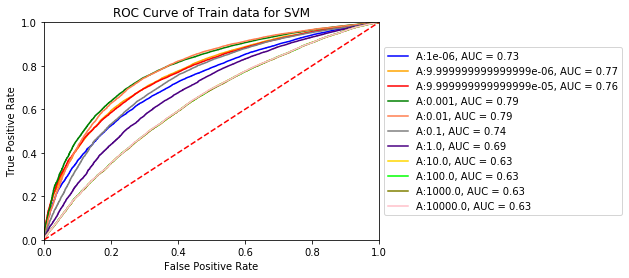

In [114]:
#https://stackoverflow.com/questions/14872835/re-initialize-the-plot-in-pylab
import matplotlib.pylab as plt
c=0
plt.figure()
#plt.hold(False)
for a_trainue in tqdm(lst):
    svc_bow = SGDClassifier(loss='hinge',penalty=p_input_bow,alpha=a_trainue,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_bow.fit(x_bow_train, y_train)
    y_bow_prob_train = svc_bow.decision_function(x_bow_train.toarray())
    #print(y_bow_prob_train.shape)
#   fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train[:, 1])
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train,tpr_train,color[c],label = 'A:' + str(a_trainue) + ', AUC = %0.2f' % roc_auc_train)
    c+=1

plt.title("ROC Curve of Train data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

100%|██████████| 11/11 [00:21<00:00,  1.96s/it]


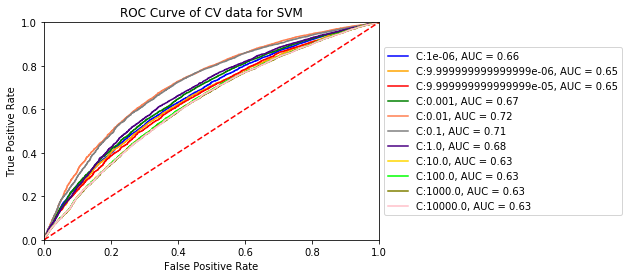

In [115]:
#https://stackoverflow.com/questions/14872835/re-initialize-the-plot-in-pylab
import matplotlib.pylab as plt
c=0
plt.figure()
#plt.hold(False)
for a_value in tqdm(lst):
    svc_bow = SGDClassifier(loss='hinge',penalty=p_input_bow,alpha=a_value,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_bow.fit(x_bow_train, y_train)
    y_bow_prob_val = svc_bow.decision_function(x_bow_val.toarray())
    #print(y_bow_prob_val.shape)
#    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val[:, 1])
    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val,tpr_val,color[c],label = 'C:' + str(a_value) + ', AUC = %0.2f' % roc_auc_val)
    c+=1

plt.title("ROC Curve of CV data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Best alpha is 0.01 with penalty of 'l2' which is the same as GridSearchCV.

### 2.4.1.3 Plotting ROC Curve for BOW

In [116]:
svc_bow = SGDClassifier(loss='hinge',penalty=p_input_bow,alpha=a_input_bow,
                            n_jobs=-1,class_weight='balanced',early_stopping=True) # Linear Kernel
#clf.fit(x_sentiment_train,y_train)

In [117]:
svc_bow=svc_bow.fit(x_bow_train,y_train)

y_bow_prob_val = svc_bow.decision_function(x_bow_val.toarray())
y_bow_prob_test = svc_bow.decision_function(x_bow_test.toarray())
y_bow_prob_train = svc_bow.decision_function(x_bow_train.toarray())

In [118]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_bow_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_bow_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_bow_prob_test)
roc_auc_bow_test = auc(fpr_test, tpr_test)

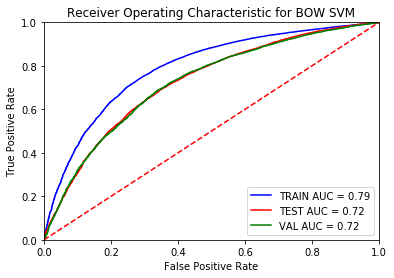

In [119]:
plt.title('Receiver Operating Characteristic for BOW SVM')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_bow_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.72 and 0.71.
- This implies a good model.

### 2.4.1.4 Plotting Confusion Matrix for BOW

In [120]:
y_pred_bow_test = svc_bow.predict(x_bow_test)
y_pred_bow_train = svc_bow.predict(x_bow_train)
y_pred_bow_val = svc_bow.predict(x_bow_val)

In [121]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_bow_test = confusion_matrix(y_test, y_pred_bow_test)

TP_test = confusion_matrix_bow_test[1, 1]
TN_test = confusion_matrix_bow_test[0, 0]
FP_test = confusion_matrix_bow_test[0, 1]
FN_test = confusion_matrix_bow_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_bow_train = confusion_matrix(y_train, y_pred_bow_train)
TP_train = confusion_matrix_bow_train[1, 1]
TN_train = confusion_matrix_bow_train[0, 0]
FP_train = confusion_matrix_bow_train[0, 1]
FN_train = confusion_matrix_bow_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_bow_val = confusion_matrix(y_val, y_pred_bow_val)
TP_val = confusion_matrix_bow_val[1, 1]
TN_val = confusion_matrix_bow_val[0, 0]
FP_val = confusion_matrix_bow_val[0, 1]
FN_val = confusion_matrix_bow_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.6947122793114076 | 0.7570635410240593 | 0.24293645897594077 | 0.30528772068859245 |
|    Test    | 0.6781964619588666 | 0.6620995365706226 |  0.3379004634293774 |  0.3218035380411333 |
| Validation | 0.6769570577357715 | 0.6689694876223373 |  0.3310305123776626 | 0.32304294226422847 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR/TNR are 0.62/0.68 while FPR/FNR are also high at 0.3/0.37.

### 2.4.1.5 Plotting Confusion Matrix for BOW

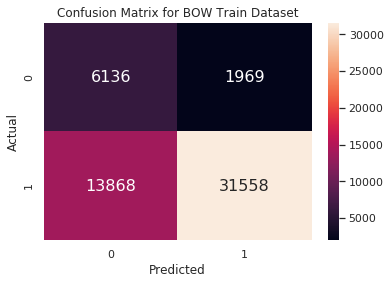

In [122]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn

sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_bow_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for BOW Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

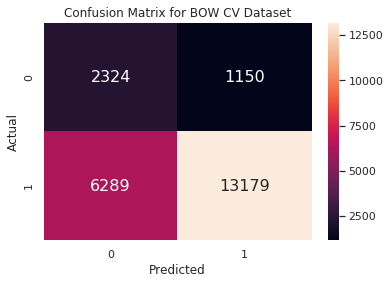

In [123]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_bow_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for BOW CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

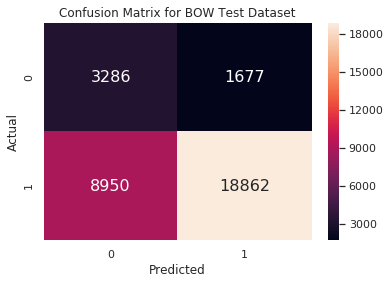

In [124]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_bow_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for BOW Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

## 2.4.2 SVM on TFIDF

### 2.4.2.1 Running GridSearchCV for hyperparameter tuning.

In [125]:
start_time = time.time()
gs=GridSearchCV(SGDClassifier(),grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=5)
gs_result=gs.fit(x_tfidf_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

a_input_tfidf = gs_result.best_params_['alpha']
p_input_tfidf = gs_result.best_params_['penalty']

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    9.1s finished


Best: 0.694664 using {'early_stopping': True, 'penalty': 'l1', 'class_weight': 'balanced', 'alpha': 9.999999999999999e-05}
Execution time: 10.349713802337646 ms


### Conclusion
- Best alpha is 0.001 with penalty of 'l2'.

### 2.4.2.2 Hyperparameter tuning manually

100%|██████████| 11/11 [00:41<00:00,  3.72s/it]


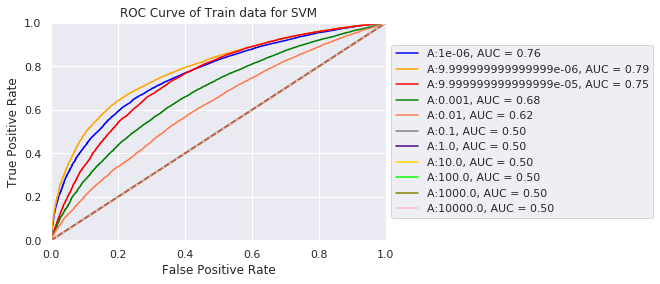

In [126]:
#https://stackoverflow.com/questions/14872835/re-initialize-the-plot-in-pylab
import matplotlib.pylab as plt
c=0
plt.figure()
#plt.hold(False)
for a_trainue in tqdm(lst):
    svc_tfidf = SGDClassifier(loss='hinge',penalty=p_input_tfidf,alpha=a_trainue,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_tfidf.fit(x_tfidf_train, y_train)
    y_tfidf_prob_train = svc_tfidf.decision_function(x_tfidf_train.toarray())
    #print(y_tfidf_prob_train.shape)
#   fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train[:, 1])
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train,tpr_train,color[c],label = 'A:' + str(a_trainue) + ', AUC = %0.2f' % roc_auc_train)
    c+=1

plt.title("ROC Curve of Train data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

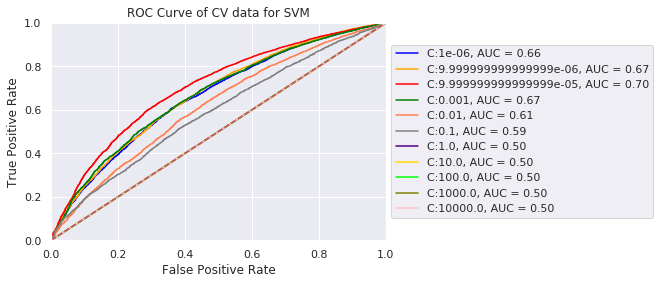

In [127]:
c=0
plt.figure()
#plt.hold(False)
for a_value in lst:
    svc_tfidf = SGDClassifier(loss='hinge',penalty=p_input_tfidf,alpha=a_value,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_tfidf.fit(x_tfidf_train, y_train)
    y_tfidf_prob_val = svc_tfidf.decision_function(x_tfidf_val.toarray())
    #y_tfidf_prob_val = neigh_tfidf.predict_proba(x_tfidf_val.toarray())
    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val,tpr_val,color[c],label = 'C:' + str(a_value) + ', AUC = %0.2f' % roc_auc_val)
    c+=1

plt.title("ROC Curve of CV data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Best alpha is 0.0001 with penalty of 'l2' using manual method.

### 2.4.2.3 ROC Curve for TFIDF

In [128]:
svc_tfidf = SGDClassifier(loss='hinge',penalty=p_input_tfidf,alpha=a_input_tfidf,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
svc_tfidf=svc_tfidf.fit(x_tfidf_train,y_train)
y_tfidf_prob_train = svc_tfidf.decision_function(x_tfidf_train.toarray())
y_tfidf_prob_val = svc_tfidf.decision_function(x_tfidf_val.toarray())
y_tfidf_prob_test = svc_tfidf.decision_function(x_tfidf_test.toarray())

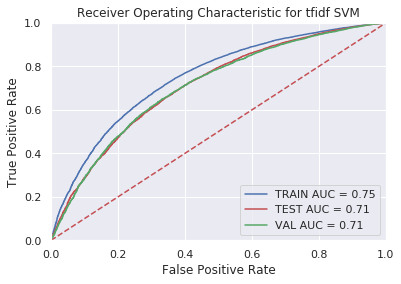

In [129]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidf_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidf_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidf_prob_test)
roc_auc_tfidf_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for tfidf SVM')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidf_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.70.
- This implies a good model.

### 2.4.2.4 Confusion Matrix for TFIDF

In [130]:
y_pred_tfidf_test = svc_tfidf.predict(x_tfidf_test)
y_pred_tfidf_train = svc_tfidf.predict(x_tfidf_train)
y_pred_tfidf_val = svc_tfidf.predict(x_tfidf_val)

In [131]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_tfidf_test = confusion_matrix(y_test, y_pred_tfidf_test)

TP_test = confusion_matrix_tfidf_test[1, 1]
TN_test = confusion_matrix_tfidf_test[0, 0]
FP_test = confusion_matrix_tfidf_test[0, 1]
FN_test = confusion_matrix_tfidf_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_tfidf_train = confusion_matrix(y_train, y_pred_tfidf_train)
TP_train = confusion_matrix_tfidf_train[1, 1]
TN_train = confusion_matrix_tfidf_train[0, 0]
FP_train = confusion_matrix_tfidf_train[0, 1]
FN_train = confusion_matrix_tfidf_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidf_val = confusion_matrix(y_val, y_pred_tfidf_val)
TP_val = confusion_matrix_tfidf_val[1, 1]
TN_val = confusion_matrix_tfidf_val[0, 0]
FP_val = confusion_matrix_tfidf_val[0, 1]
FN_val = confusion_matrix_tfidf_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.5901686258970633 | 0.7700185070943861 | 0.22998149290561382 | 0.40983137410293663 |
|    Test    | 0.5813317992233569 | 0.7233528107999194 |  0.2766471892000806 |  0.4186682007766432 |
| Validation | 0.5805424286007808 | 0.7294185377086931 | 0.27058146229130686 | 0.41945757139921924 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR/TNR are above 0.5 at 0.66/0.63 while FPR/FNR are also high at 0.36/0.33.

### 2.4.2.5 Plotting confusion Matrix

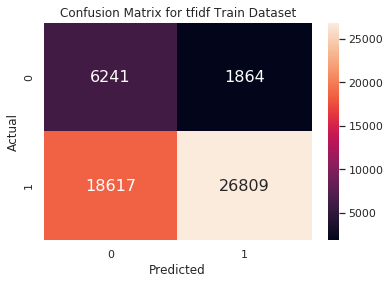

In [132]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidf_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for tfidf Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

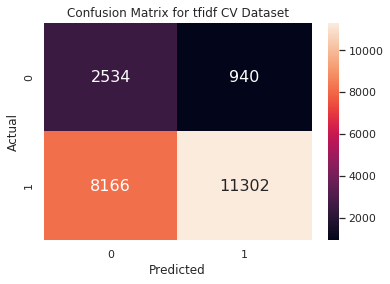

In [133]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidf_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for tfidf CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

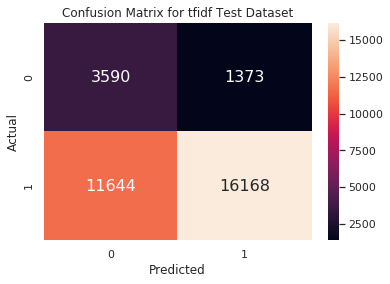

In [134]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidf_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for tfidf Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

## 2.4.3 SVM on Average W2V

### 2.4.3.1 Finding Hyperparameters using GridSearchCV

In [135]:
start_time = time.time()
gs=GridSearchCV(SGDClassifier(),grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=5)
gs_result=gs.fit(x_avgw2v_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

a_input_avgw2v = gs_result.best_params_['alpha']
p_input_avgw2v = gs_result.best_params_['penalty']

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   32.6s finished


Best: 0.684585 using {'early_stopping': True, 'penalty': 'l2', 'class_weight': 'balanced', 'alpha': 0.001}
Execution time: 34.93637657165527 ms


### Conclusion
- Best alpha is 0.001 with penalty of 'l2'.

### 2.4.3.2 Finding Hyperparameter manually

100%|██████████| 11/11 [00:34<00:00,  2.95s/it]


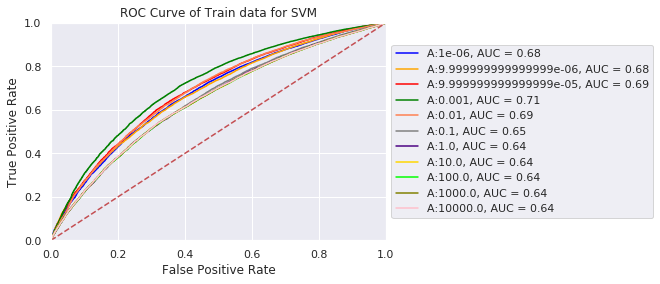

In [136]:
#https://stackoverflow.com/questions/14872835/re-initialize-the-plot-in-pylab
import matplotlib.pylab as plt
c=0
plt.figure()
#plt.hold(False)
for a_trainue in tqdm(lst):
    svc_avgw2v = SGDClassifier(loss='hinge',penalty=p_input_avgw2v,alpha=a_trainue,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_avgw2v.fit(x_avgw2v_train, y_train)
    y_avgw2v_prob_train = svc_avgw2v.decision_function(x_avgw2v_train.toarray())
    #print(y_avgw2v_prob_train.shape)
#   fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train[:, 1])
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train,tpr_train,color[c],label = 'A:' + str(a_trainue) + ', AUC = %0.2f' % roc_auc_train)
    c+=1

plt.title("ROC Curve of Train data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

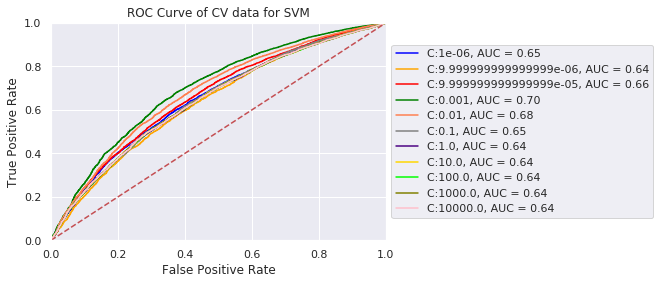

In [137]:
c=0
plt.figure()
#plt.hold(False)
for a_value in lst:
    svc_avgw2v = SGDClassifier(loss='hinge',penalty=p_input_bow,alpha=a_value,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_avgw2v.fit(x_avgw2v_train, y_train)
    y_avgw2v_prob_val = svc_avgw2v.decision_function(x_avgw2v_val.toarray())
    #y_avgw2v_prob_val = neigh_avgw2v.predict_proba(x_avgw2v_val.toarray())
    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val,tpr_val,color[c],label = 'C:' + str(a_value) + ', AUC = %0.2f' % roc_auc_val)
    c+=1

plt.title("ROC Curve of CV data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Best alpha is 0.001 with penalty of 'l2'.

### 2.4.3.3 Plotting ROC Curve for Average W2V

In [138]:
svc_avgw2v = SGDClassifier(loss='hinge',penalty=p_input_tfidf,alpha=a_input_avgw2v,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
svc_avgw2v = svc_avgw2v.fit(x_avgw2v_train,y_train)
y_avgw2v_prob_train = svc_avgw2v.decision_function(x_avgw2v_train.toarray())
y_avgw2v_prob_val = svc_avgw2v.decision_function(x_avgw2v_val.toarray())
y_avgw2v_prob_test = svc_avgw2v.decision_function(x_avgw2v_test.toarray())

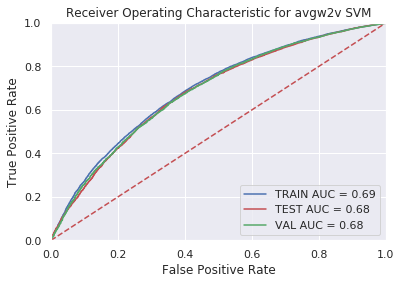

In [139]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_avgw2v_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_avgw2v_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_avgw2v_prob_test)
roc_auc_avgw2v_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for avgw2v SVM')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_avgw2v_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.69.
- This implies a good model.

### 2.4.3.4 Displaying Confusion Matrix

In [140]:
y_pred_avgw2v_test = svc_avgw2v.predict(x_avgw2v_test)
y_pred_avgw2v_train = svc_avgw2v.predict(x_avgw2v_train)
y_pred_avgw2v_val = svc_avgw2v.predict(x_avgw2v_val)

In [141]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_avgw2v_test = confusion_matrix(y_test, y_pred_avgw2v_test)

TP_test = confusion_matrix_avgw2v_test[1, 1]
TN_test = confusion_matrix_avgw2v_test[0, 0]
FP_test = confusion_matrix_avgw2v_test[0, 1]
FN_test = confusion_matrix_avgw2v_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_avgw2v_train = confusion_matrix(y_train, y_pred_avgw2v_train)
TP_train = confusion_matrix_avgw2v_train[1, 1]
TN_train = confusion_matrix_avgw2v_train[0, 0]
FP_train = confusion_matrix_avgw2v_train[0, 1]
FN_train = confusion_matrix_avgw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_avgw2v_val = confusion_matrix(y_val, y_pred_avgw2v_val)
TP_val = confusion_matrix_avgw2v_val[1, 1]
TN_val = confusion_matrix_avgw2v_val[0, 0]
FP_val = confusion_matrix_avgw2v_val[0, 1]
FN_val = confusion_matrix_avgw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+---------------------+--------------------+---------------------+
|    Data    |        TPR         |         TNR         |        FPR         |         FNR         |
+------------+--------------------+---------------------+--------------------+---------------------+
|   Train    | 0.8278518909875402 |  0.4187538556446638 | 0.5812461443553362 | 0.17214810901245983 |
|    Test    | 0.8267654249964044 | 0.40479548660084624 | 0.5952045133991537 | 0.17323457500359557 |
| Validation | 0.8286932401890281 | 0.40788716177317214 | 0.5921128382268278 | 0.17130675981097185 |
+------------+--------------------+---------------------+--------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR is below 0.5 at 0.49/ TNR is above 0.773 while FPR is at 0.22/ FNR is high at 0.5.

### 2.4.3.5 Plotting Confusion Matrix 

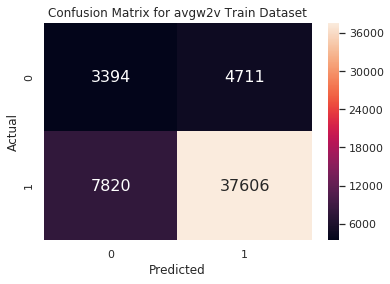

In [142]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_avgw2v_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for avgw2v Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

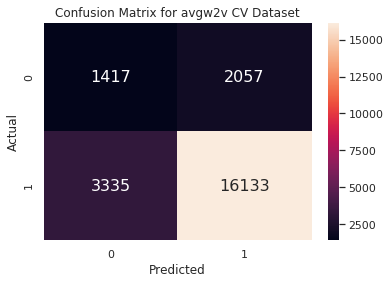

In [143]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_avgw2v_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for avgw2v CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

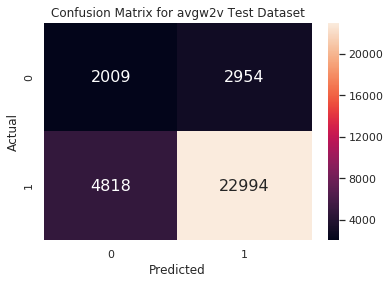

In [144]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_avgw2v_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for avgw2v Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

## 2.4.4 SVM on TFIDF W2V

### 2.4.4.1 Finding Hyperparameter using GridSearchCV

In [145]:
start_time = time.time()
gs=GridSearchCV(SGDClassifier(),grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=5)
gs_result=gs.fit(x_tfidfw2v_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

a_input_tfidfw2v = gs_result.best_params_['alpha']
p_input_tfidfw2v = gs_result.best_params_['penalty']

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   26.8s finished


Best: 0.689762 using {'early_stopping': True, 'penalty': 'l2', 'class_weight': 'balanced', 'alpha': 0.01}
Execution time: 29.54418659210205 ms


### Conclusion
- Best alpha is 0.01 with penalty of 'l2'.

### 2.4.4.1 Finding Hyperparameter manually

100%|██████████| 11/11 [00:34<00:00,  3.09s/it]


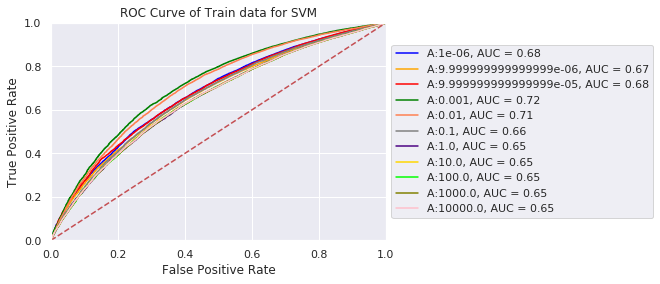

In [146]:
c=0
plt.figure()
#plt.hold(False)
for a_value in tqdm(lst):
    svc_tfidfw2v = SGDClassifier(loss='hinge',penalty=p_input_tfidfw2v,alpha=a_value,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_tfidfw2v.fit(x_tfidfw2v_train, y_train)
    y_tfidfw2v_prob_train = svc_tfidfw2v.decision_function(x_tfidfw2v_train.toarray())
    #print(y_tfidfw2v_prob_val.shape)
#   fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val[:, 1])
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train,tpr_train,color[c],label = 'A:' + str(a_value) + ', AUC = %0.2f' % roc_auc_train)
    c+=1

plt.title("ROC Curve of Train data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

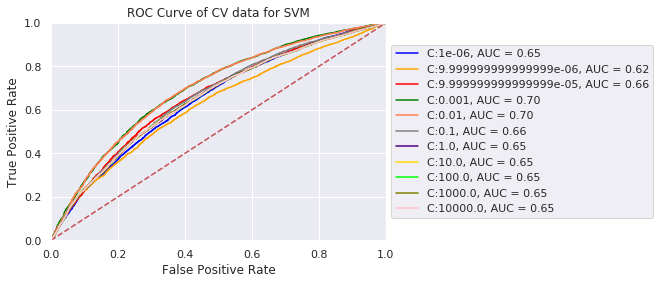

In [147]:
c=0
plt.figure()
#plt.hold(False)
for a_value in lst:
    svc_tfidfw2v = SGDClassifier(loss='hinge',penalty=p_input_bow,alpha=a_value,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
    svc_tfidfw2v.fit(x_tfidfw2v_train, y_train)
    y_tfidfw2v_prob_val = svc_tfidfw2v.decision_function(x_tfidfw2v_val.toarray())
    #y_tfidfw2v_prob_val = neigh_tfidfw2v.predict_proba(x_tfidfw2v_val.toarray())
    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val,tpr_val,color[c],label = 'C:' + str(a_value) + ', AUC = %0.2f' % roc_auc_val)
    c+=1

plt.title("ROC Curve of CV data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Best alpha is 0.01/0.001 with penalty of 'l2'.

### 2.4.4.2 Plotting ROC Curve for TFIDF W2V

In [148]:
svc_tfidfw2v = SGDClassifier(loss='hinge',penalty=p_input_tfidfw2v,alpha=a_input_tfidfw2v,
                            n_jobs=-1,class_weight='balanced',early_stopping=True)
svc_tfidfw2v=svc_tfidfw2v.fit(x_tfidfw2v_train,y_train)
y_tfidfw2v_prob_train = svc_tfidfw2v.decision_function(x_tfidfw2v_train.toarray())
y_tfidfw2v_prob_val = svc_tfidfw2v.decision_function(x_tfidfw2v_val.toarray())
y_tfidfw2v_prob_test = svc_tfidfw2v.decision_function(x_tfidfw2v_test.toarray())

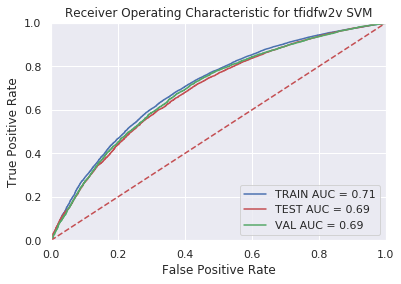

In [149]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_tfidfw2v_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_tfidfw2v_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_tfidfw2v_prob_test)
roc_auc_tfidfw2v_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for tfidfw2v SVM')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_tfidfw2v_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.69.
- This implies a good model.

### 2.4.4.4 Displaying Confusion Matrix

In [150]:
y_pred_tfidfw2v_test = svc_tfidfw2v.predict(x_tfidfw2v_test)
y_pred_tfidfw2v_train = svc_tfidfw2v.predict(x_tfidfw2v_train)
y_pred_tfidfw2v_val = svc_tfidfw2v.predict(x_tfidfw2v_val)


In [151]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_tfidfw2v_test = confusion_matrix(y_test, y_pred_tfidfw2v_test)

TP_test = confusion_matrix_tfidfw2v_test[1, 1]
TN_test = confusion_matrix_tfidfw2v_test[0, 0]
FP_test = confusion_matrix_tfidfw2v_test[0, 1]
FN_test = confusion_matrix_tfidfw2v_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_tfidfw2v_train = confusion_matrix(y_train, y_pred_tfidfw2v_train)
TP_train = confusion_matrix_tfidfw2v_train[1, 1]
TN_train = confusion_matrix_tfidfw2v_train[0, 0]
FP_train = confusion_matrix_tfidfw2v_train[0, 1]
FN_train = confusion_matrix_tfidfw2v_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_tfidfw2v_val = confusion_matrix(y_val, y_pred_tfidfw2v_val)
TP_val = confusion_matrix_tfidfw2v_val[1, 1]
TN_val = confusion_matrix_tfidfw2v_val[0, 0]
FP_val = confusion_matrix_tfidfw2v_val[0, 1]
FN_val = confusion_matrix_tfidfw2v_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)

+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.6805133623915819 | 0.6289944478716841 |  0.3710055521283159 |  0.3194866376084181 |
|    Test    | 0.6734862649216166 | 0.6062865202498489 | 0.39371347975015114 | 0.32651373507838344 |
| Validation | 0.6783953153893569 | 0.6177317213586644 |  0.3822682786413356 |  0.3216046846106431 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR is below 0.5 at 0.45/ TNR is above 0.8 while FPR is at 0.20/ FNR is high at 0.54.

### 2.4.4.5 Plotting Confusion Matrix

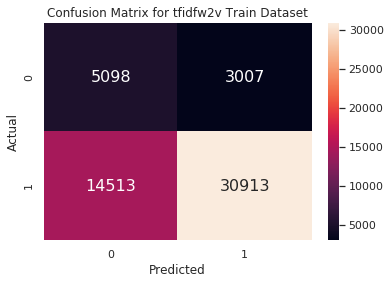

In [152]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidfw2v_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for tfidfw2v Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

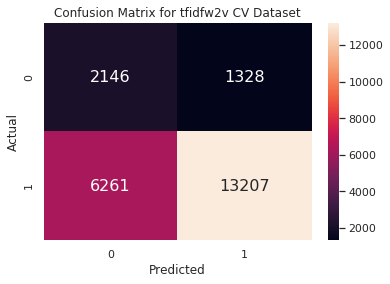

In [153]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidfw2v_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for tfidfw2v CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

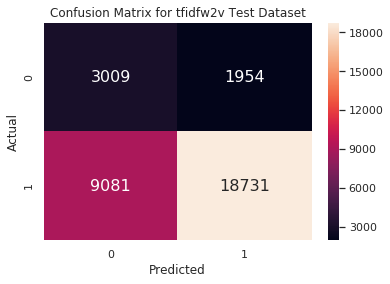

In [154]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_tfidfw2v_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for tfidfw2v Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

 <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>

### 2.5.1 Performing Sentiment Analysis on Essay

In [155]:
#http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sentiment_pos_train=[]
sentiment_neg_train=[]
sentiment_neu_train=[]
sentiment_com_train=[]

for row in X_train["essay"]:
    ss = analyser.polarity_scores(row)
    sentiment_pos_train.append(ss['pos'])
    sentiment_neg_train.append(ss['neg'])
    sentiment_neu_train.append(ss['neu'])
    sentiment_com_train.append(ss['compound'])   

In [156]:
sentiment_pos_train=np.array(sentiment_pos_train)
sentiment_pos_train.shape=(len(sentiment_pos_train),1)
print(sentiment_pos_train.shape)
sentiment_neg_train=np.array(sentiment_neg_train)
sentiment_neg_train.shape=(len(sentiment_neg_train),1)
print(sentiment_neg_train.shape)
sentiment_neu_train=np.array(sentiment_neu_train)
sentiment_neu_train.shape=(len(sentiment_neu_train),1)
print(sentiment_neu_train.shape)
sentiment_com_train=np.array(sentiment_com_train)
sentiment_com_train.shape=(len(sentiment_com_train),1)
print(sentiment_com_train.shape)

(53531, 1)
(53531, 1)
(53531, 1)
(53531, 1)


In [157]:
analyser = SentimentIntensityAnalyzer()
sentiment_pos_val=[]
sentiment_neg_val=[]
sentiment_neu_val=[]
sentiment_com_val=[]

for row in X_val["essay"]:
    ss = analyser.polarity_scores(row)
    sentiment_pos_val.append(ss['pos'])
    sentiment_neg_val.append(ss['neg'])
    sentiment_neu_val.append(ss['neu'])
    sentiment_com_val.append(ss['compound'])

In [158]:
sentiment_pos_val=np.array(sentiment_pos_val)
sentiment_pos_val.shape=(len(sentiment_pos_val),1)
print(sentiment_pos_val.shape)
sentiment_neg_val=np.array(sentiment_neg_val)
sentiment_neg_val.shape=(len(sentiment_neg_val),1)
print(sentiment_neg_val.shape)
sentiment_neu_val=np.array(sentiment_neu_val)
sentiment_neu_val.shape=(len(sentiment_neu_val),1)
print(sentiment_neu_val.shape)
sentiment_com_val=np.array(sentiment_com_val)
sentiment_com_val.shape=(len(sentiment_com_val),1)
print(sentiment_com_val.shape)

(22942, 1)
(22942, 1)
(22942, 1)
(22942, 1)


In [159]:
analyser = SentimentIntensityAnalyzer()
sentiment_pos_test=[]
sentiment_neg_test=[]
sentiment_neu_test=[]
sentiment_com_test=[]

for row in X_test["essay"]:
    ss = analyser.polarity_scores(row)
    sentiment_pos_test.append(ss['pos'])
    sentiment_neg_test.append(ss['neg'])
    sentiment_neu_test.append(ss['neu'])
    sentiment_com_test.append(ss['compound'])

In [160]:
sentiment_pos_test=np.array(sentiment_pos_test)
sentiment_pos_test.shape=(len(sentiment_pos_test),1)
print(sentiment_pos_test.shape)
sentiment_neg_test=np.array(sentiment_neg_test)
sentiment_neg_test.shape=(len(sentiment_neg_test),1)
print(sentiment_neg_test.shape)
sentiment_neu_test=np.array(sentiment_neu_test)
sentiment_neu_test.shape=(len(sentiment_neu_test),1)
print(sentiment_neu_test.shape)
sentiment_com_test=np.array(sentiment_com_test)
sentiment_com_test.shape=(len(sentiment_com_test),1)
print(sentiment_com_test.shape)

(32775, 1)
(32775, 1)
(32775, 1)
(32775, 1)


In [161]:
#https://www.geeksforgeeks.org/python-program-to-count-words-in-a-sentence/
#no of words in title
import re
no_words_title_train=[]
for row in X_train['project_title']:
    no_words_title_train.append(len(re.findall(r'\w+', row)))
    
no_words_title_val=[]
for row in X_val['project_title']:
    no_words_title_val.append(len(re.findall(r'\w+', row)))

no_words_title_test=[]
for row in X_test['project_title']:
    no_words_title_test.append(len(re.findall(r'\w+', row)))

In [162]:
#https://stackoverflow.com/questions/15868512/list-to-array-conversion
from sklearn.preprocessing import StandardScaler
title_train_scalar=StandardScaler()
title_train_scalar.fit(np.asarray(no_words_title_train).reshape(-1,1))
print("Mean :" + str(title_train_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(title_train_scalar.var_[0])))

title_st_train=title_train_scalar.transform(np.asarray(no_words_title_train).reshape(-1,1))
title_st_val=title_train_scalar.transform(np.asarray(no_words_title_val).reshape(-1,1))
title_st_test=title_train_scalar.transform(np.asarray(no_words_title_test).reshape(-1,1))

Mean :5.284844295828585, Standard deviation :2.188415678016295


In [163]:
#no of words in title
#import re
no_words_essay_train=[]
for row in X_train['essay']:
    no_words_essay_train.append(len(re.findall(r'\w+', row)))
    
no_words_essay_val=[]
for row in X_val['essay']:
    no_words_essay_val.append(len(re.findall(r'\w+', row)))
    
no_words_essay_test=[]
for row in X_test['essay']:
    no_words_essay_test.append(len(re.findall(r'\w+', row)))

In [164]:
#https://stackoverflow.com/questions/15868512/list-to-array-conversion
#from sklearn.preprocessing import StandardScaler
essay_train_scalar=StandardScaler()
essay_train_scalar.fit(np.asarray(no_words_essay_train).reshape(-1,1))
print("Mean :" + str(essay_train_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(essay_train_scalar.var_[0])))

essay_st_train=essay_train_scalar.transform(np.asarray(no_words_essay_train).reshape(-1,1))
essay_st_val=essay_train_scalar.transform(np.asarray(no_words_essay_val).reshape(-1,1))
essay_st_test=essay_train_scalar.transform(np.asarray(no_words_essay_test).reshape(-1,1))      

Mean :267.1755618239898, Standard deviation :68.0460929099291


In [165]:
print(text_tfidf_train.shape)
print(text_tfidf_test.shape)
print(text_tfidf_val.shape)

(53531, 5000)
(32775, 5000)
(22942, 5000)


In [166]:
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
from sklearn.decomposition import TruncatedSVD
#Import svm model
import matplotlib.pylab as plt

### Finding Best n_componets for TruncatedSVD

100%|██████████| 10/10 [04:31<00:00, 31.73s/it]


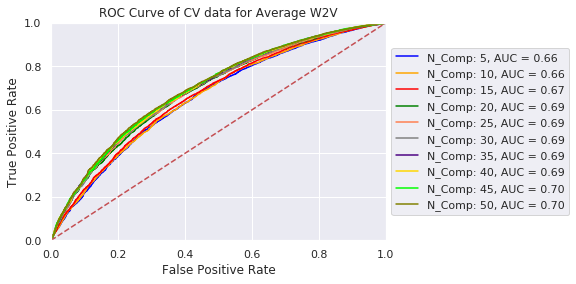

In [167]:
c=0
#https://stackoverflow.com/questions/14872835/re-initialize-the-plot-in-pylab
#https://stackoverflow.com/questions/43431765/plotting-roc-curve-in-python

from sklearn.svm import LinearSVC
plt.figure()
lst=[5,10,15,20,25,30,35,40,45,50]
#n_comp=5
for n in tqdm(lst):
    #print("***"+str(n)+ "**** started")
    svd = TruncatedSVD(n_components=n, random_state=42)
    n_tsvd_train=svd.fit_transform(text_tfidf_train)
    n_tsvd_val=svd.transform(text_tfidf_val)
    x_sentiment_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train,sentiment_pos_train,sentiment_neg_train, sentiment_neu_train,sentiment_com_train,
            np.array(title_st_train),np.array(essay_st_train),n_tsvd_train))

    x_sentiment_val = hstack((categories_one_hot_val, sub_categories_one_hot_val, 
                      teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,price_standardized_val, quantity_standardized_val,teacher_number_standardized_val,
           sentiment_pos_val,sentiment_neg_val, sentiment_neu_val,sentiment_com_val,
            np.array(title_st_val), np.array(essay_st_val),n_tsvd_val))
    #print("***"+"TSVD Completed"+ "**** started")
    #Create a svm Classifier
    clf = LinearSVC(class_weight='balanced') # Linear Kernel
    clf.fit(x_sentiment_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.decision_function(x_sentiment_val)
    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_pred)
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val,tpr_val,color[c],label = 'N_Comp: ' + str(n) + ', AUC = %0.2f' % roc_auc_val)
    c+=1
    #print("***"+str(n)+ "**** ended")

    
plt.title("ROC Curve of CV data for Average W2V")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
 - Best auc value is for n_components value of 45.

### Finding best hypermater using GridSearchCV

In [168]:
n_comp=45
svd = TruncatedSVD(n_components=n_comp, random_state=42)
n_tsvd_train=svd.fit_transform(text_tfidf_train)
n_tsvd_val=svd.transform(text_tfidf_val)
n_tsvd_test=svd.transform(text_tfidf_test)

In [169]:
x_sentiment_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, 
                      teacher_prefix_one_hot_train, project_grade_category_one_hot_train,state_one_hot_train
           ,price_standardized_train, quantity_standardized_train
           ,teacher_number_standardized_train,
           sentiment_pos_train,sentiment_neg_train, sentiment_neu_train,sentiment_com_train,
            np.array(title_st_train),np.array(essay_st_train),n_tsvd_train))
x_sentiment_train.shape

(53531, 153)

In [170]:
x_sentiment_val = hstack((categories_one_hot_val, sub_categories_one_hot_val, 
                      teacher_prefix_one_hot_val, project_grade_category_one_hot_val,state_one_hot_val
           ,price_standardized_val, quantity_standardized_val
           ,teacher_number_standardized_val,
           sentiment_pos_val,sentiment_neg_val, sentiment_neu_val,sentiment_com_val,
            np.array(title_st_val),
            np.array(essay_st_val),n_tsvd_val))
x_sentiment_val.shape

(22942, 153)

In [171]:
x_sentiment_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, 
                      teacher_prefix_one_hot_test, project_grade_category_one_hot_test,state_one_hot_test
           ,price_standardized_test, quantity_standardized_test
           ,teacher_number_standardized_test,
           sentiment_pos_test,sentiment_neg_test, sentiment_neu_test,sentiment_com_test,
            np.array(title_st_test),
            np.array(essay_st_test),n_tsvd_test))
x_sentiment_test.shape

(32775, 153)

In [172]:
start_time = time.time()
scoring = {'AUC': 'roc_auc'}
lst=[]
input=0.000001
while input<=10000:
    lst.append(input)
    input*=10

penalty=['l1','l2']
grid_parms={'class_weight': weight,'C':lst}
gs=GridSearchCV(LinearSVC(),grid_parms,verbose=True,scoring = scoring,n_jobs=-1,refit='AUC', 
                return_train_score=True,cv=5)
gs_result=gs.fit(x_sentiment_train,y_train.values.reshape(-1,1))
# Summarize results
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

c_input_sentiment = gs_result.best_params_['C']
#k_input_sentiment = gs_result.best_params_['kernel']

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.4min finished


Best: 0.690798 using {'C': 0.1, 'class_weight': 'balanced'}
Execution time: 112.44886636734009 ms


### Conclusion
 - c value of 0.1 is the best value using GridSearchCV.

### Plotting ROC Curve for different C_Value

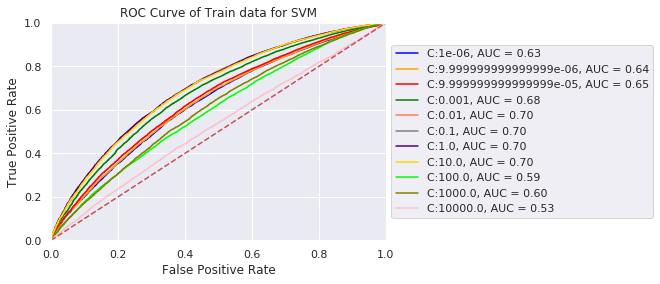

In [173]:
c=0
plt.figure()
#plt.hold(False)
for c_value in lst:
    svc_sentiment = LinearSVC(C=c_value,class_weight = 'balanced')
    svc_sentiment.fit(x_sentiment_train, y_train)
    y_sentiment_prob = svc_sentiment.decision_function(x_sentiment_train.toarray())
    #y_sentiment_prob_val = neigh_sentiment.predict_proba(x_sentiment_val.toarray())
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_sentiment_prob)
    roc_auc_train = auc(fpr_train, tpr_train)
    plt.plot(fpr_train,tpr_train,color[c],label = 'C:' + str(c_value) + ', AUC = %0.2f' % roc_auc_train)
    c+=1

plt.title("ROC Curve of Train data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

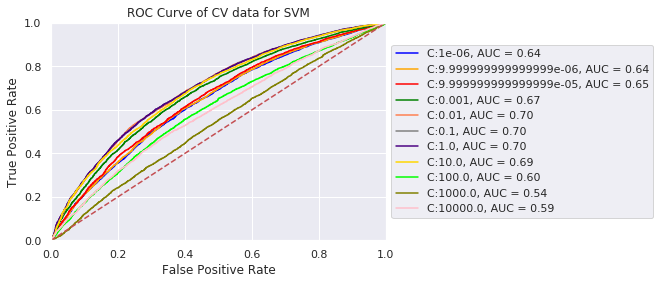

In [174]:
c=0
plt.figure()
#plt.hold(False)
for c_value in lst:
    svc_sentiment = LinearSVC(C=c_value,class_weight = 'balanced')
    svc_sentiment.fit(x_sentiment_train, y_train)
    y_sentiment_prob_val = svc_sentiment.decision_function(x_sentiment_val.toarray())
    #y_sentiment_prob_val = neigh_sentiment.predict_proba(x_sentiment_val.toarray())
    fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_sentiment_prob_val)
    roc_auc_val = auc(fpr_val, tpr_val)
    plt.plot(fpr_val,tpr_val,color[c],label = 'C:' + str(c_value) + ', AUC = %0.2f' % roc_auc_val)
    c+=1

plt.title("ROC Curve of CV data for SVM")
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
 - c value of 0.01 is the best value using manual method.

### 2.5.4 Plotting ROC curve

In [175]:
svc_sentiment = LinearSVC(C=c_input_sentiment,class_weight='balanced')
svc_sentiment=svc_sentiment.fit(x_sentiment_train,y_train)

In [176]:
y_sentiment_prob_train = svc_sentiment.decision_function(x_sentiment_train.toarray())
y_sentiment_prob_val = svc_sentiment.decision_function(x_sentiment_val.toarray())
y_sentiment_prob_test = svc_sentiment.decision_function(x_sentiment_test.toarray())

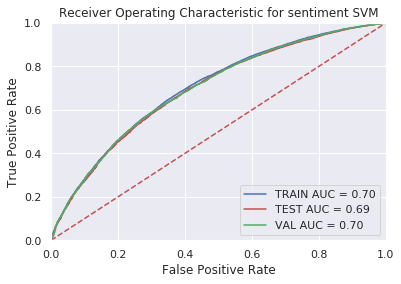

In [177]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_sentiment_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_val, tpr_val, threshold_val = roc_curve(y_val, y_sentiment_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_sentiment_prob_test)
roc_auc_sentiment_test = auc(fpr_test, tpr_test)

plt.title('Receiver Operating Characteristic for sentiment SVM')
plt.plot(fpr_train, tpr_train, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label = 'TEST AUC = %0.2f' % roc_auc_sentiment_test)
plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
#plt.plot(fpr_val, tpr_val, 'g', label = 'VAL AUC = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion
- Test and CV auc value is 0.69.
- This implies a good model.

### Plotting Confusion Matrix

In [178]:
y_pred_sentiment_test = svc_sentiment.predict(x_sentiment_test)
y_pred_sentiment_train = svc_sentiment.predict(x_sentiment_train)
y_pred_sentiment_val = svc_sentiment.predict(x_sentiment_val)

In [179]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

confusion_matrix_sentiment_test = confusion_matrix(y_test, y_pred_sentiment_test)

TP_test = confusion_matrix_sentiment_test[1, 1]
TN_test = confusion_matrix_sentiment_test[0, 0]
FP_test = confusion_matrix_sentiment_test[0, 1]
FN_test = confusion_matrix_sentiment_test[1, 0]
TPR_test= TP_test / (FN_test + TP_test)
TNR_test= TN_test / (TN_test + FP_test)
FPR_test= FP_test / (TN_test + FP_test)
FNR_test = FN_test / (FN_test+TP_test)

confusion_matrix_sentiment_train = confusion_matrix(y_train, y_pred_sentiment_train)
TP_train = confusion_matrix_sentiment_train[1, 1]
TN_train = confusion_matrix_sentiment_train[0, 0]
FP_train = confusion_matrix_sentiment_train[0, 1]
FN_train = confusion_matrix_sentiment_train[1, 0]
TPR_train= TP_train / (FN_train + TP_train)
TNR_train= TN_train / (TN_train + FP_train)
FPR_train= FP_train / (TN_train + FP_train)
FNR_train = FN_train / (FN_train+TP_train)

confusion_matrix_sentiment_val = confusion_matrix(y_val, y_pred_sentiment_val)
TP_val = confusion_matrix_sentiment_val[1, 1]
TN_val = confusion_matrix_sentiment_val[0, 0]
FP_val = confusion_matrix_sentiment_val[0, 1]
FN_val = confusion_matrix_sentiment_val[1, 0]
TPR_val= TP_val / (FN_val + TP_val)
TNR_val= TN_val / (TN_val + FP_val)
FPR_val= FP_val / (TN_val + FP_val)
FNR_val = FN_val / (FN_val+TP_val)

#from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Data", "TPR","TNR","FPR","FNR"]
x.add_row(["Train",TPR_train,TNR_train,FPR_train,FNR_train])
x.add_row(["Test",TPR_test,TNR_test,FPR_test,FNR_test])
x.add_row(["Validation",TPR_val,TNR_val,FPR_val,FNR_val])

print(x)


+------------+--------------------+--------------------+---------------------+---------------------+
|    Data    |        TPR         |        TNR         |         FPR         |         FNR         |
+------------+--------------------+--------------------+---------------------+---------------------+
|   Train    | 0.6336899572931801 | 0.6624305983960518 | 0.33756940160394816 |  0.3663100427068199 |
|    Test    | 0.6335035236588523 | 0.6504130566189804 | 0.34958694338101953 |  0.3664964763411477 |
| Validation | 0.634579823299774  | 0.6508347725964306 | 0.34916522740356937 | 0.36542017670022603 |
+------------+--------------------+--------------------+---------------------+---------------------+


### Conclusion: 
- For a good model, TPR/TNR should be high and FPR/FNR should be low.
- In this model, TPR is above 0.5 at 0.62/ TNR is above 0.64 while FPR is at 0.35/ FNR is high at 0.37.

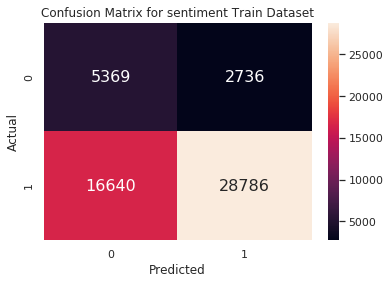

In [180]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_sentiment_train, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for sentiment Train Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

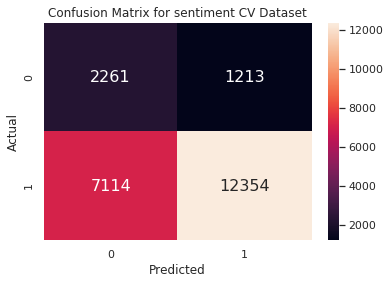

In [181]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_sentiment_val, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for sentiment CV Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

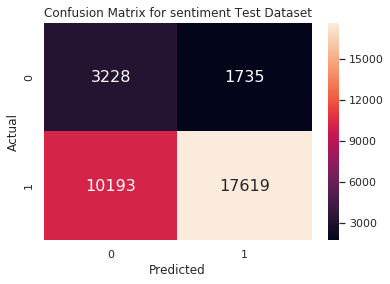

In [182]:
sn.set(font_scale=1)#for label size
ax = sn.heatmap(confusion_matrix_sentiment_test, annot=True,annot_kws={"size": 16},fmt='g')# font size
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# labels, title and ticks
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted'); 
ax.set_title('Confusion Matrix for sentiment Test Dataset'); 
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1']);

<h1>3. Conclusions</h1>

In [183]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizor", "Penalty","Hyper Parameter","AUC"]
x.add_row(["BOW",p_input_bow,a_input_bow,roc_auc_bow_test])
x.add_row(["TF-IDF",p_input_tfidf,a_input_tfidf,roc_auc_tfidf_test])
x.add_row(["Average W2V",p_input_avgw2v,a_input_avgw2v,roc_auc_avgw2v_test])
x.add_row(["TF-IDF W2V",p_input_tfidfw2v,a_input_tfidfw2v,roc_auc_tfidfw2v_test])
x.add_row(["Sentiment Feature","Brute",c_input_sentiment,roc_auc_sentiment_test])
print(x)

+-------------------+---------+-----------------------+--------------------+
|     Vectorizor    | Penalty |    Hyper Parameter    |        AUC         |
+-------------------+---------+-----------------------+--------------------+
|        BOW        |    l2   |          0.01         | 0.7244996912141941 |
|       TF-IDF      |    l1   | 9.999999999999999e-05 | 0.7108331192026229 |
|    Average W2V    |    l2   |         0.001         | 0.6828474838644166 |
|     TF-IDF W2V    |    l2   |          0.01         | 0.6897449656148147 |
| Sentiment Feature |  Brute  |          0.1          | 0.6942385735559202 |
+-------------------+---------+-----------------------+--------------------+


### Conclusion
 - Best model is BOW with hyperparameter of 0.01 and auc of 0.71